# Load the dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                   

df = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/Evaluate-Improve-Models/master/house_prices.csv')
df.sample(5)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),...,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalesPrice
1551,30,60.00000,7392,5,7,1930,1995,0.0,0.0,0.0,520.0,520.0,912,0,0,912,0.0,0.0,1,0,2,1,5,0,1934.0,1.0,360.0,0,90,0,0,0,0,0,5,2008,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,99500
492,60,69.22459,8755,7,5,1999,1999,298.0,772.0,0.0,220.0,992.0,1022,1038,0,2060,1.0,0.0,2,1,3,1,8,1,1999.0,2.0,390.0,0,0,0,168,0,0,0,6,2009,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,214000
2647,70,50.00000,9000,5,6,1880,1991,0.0,0.0,0.0,636.0,636.0,1089,661,0,1750,0.0,0.0,1,0,3,1,8,0,1937.0,1.0,240.0,0,0,293,0,0,0,0,6,2006,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,124000
1070,120,65.00000,8769,9,5,2008,2008,766.0,1540.0,0.0,162.0,1702.0,1702,0,0,1702,1.0,0.0,1,1,1,1,7,1,2008.0,3.0,1052.0,0,72,0,0,224,0,0,10,2008,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,367294
1621,80,69.22459,10147,6,5,1994,1994,32.0,186.0,0.0,206.0,392.0,924,770,0,1694,0.0,0.0,2,1,3,1,7,1,1994.0,2.0,398.0,256,64,0,0,0,0,0,3,2007,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,160000


# "Garage Area" and "SalesPrice" features are selected to analyze.

In [0]:
new_df = df[["Garage Area","SalesPrice"]]  # code comes here

## Convert the data into numpy arrays of two variables, X and y.

In [0]:
X = np.array(new_df[["Garage Area"]]) #code comes here
y = np.array(new_df[["SalesPrice"]])  #code comes here 
print(X.shape) # Vewing the shape of X
print(y.shape) # Vewing the shape of y

(2930, 1)
(2930, 1)


## Split train and test data with 0.2 ratio.

In [0]:
from sklearn.model_selection import train_test_split
# code comes here
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

# Linear Regression
Train a linear regression.

In [0]:
from sklearn import linear_model 

# code comes here
regressor = linear_model.LinearRegression()
# code comes here
regressor.fit(x_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Calculate train and test R2.

In [0]:
from sklearn.metrics import r2_score

# code comes here
x_pred = regressor.predict(x_train)
print("Train:", r2_score(y_train,x_pred))

# code comes here
y_pred = regressor.predict(x_test)
print("Test:", r2_score(y_test,y_pred))

Train: 0.4036140916008528
Test: 0.4352323177438491


## Print the bias and the slope.

In [0]:
print('Regressor coeffient or slope:',regressor.coef_[0][0])
print('Interception point with axis:',regressor.intercept_[0])

Regressor coeffient or slope: 237.58546612392706
Interception point with axis: 68779.89798972152


## Plot the test set with scatter plot and add the linear regression model line.
Remember linear regression recitation.

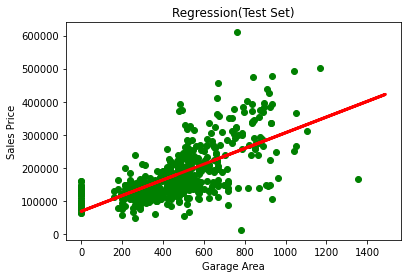

In [0]:
# Plot a graph with X_test vs y_test
plt.scatter(x_test,y_test,color="green")
#print(x_test.shape)
#print(y_test.shape)
y_pred = regressor.predict(x_train)
plt.plot(x_train,y_pred,color="red",linewidth=3)
#print(x_train.shape)
#print(y_pred.shape)
plt.title('Regression(Test Set)')
plt.xlabel('Garage Area')
plt.ylabel('Sales Price')
plt.show()
# Regressior line showing


# Multiple Linear Regression
Select all features.

In [0]:
X = np.array(df.iloc[:,:-1].values) # code comes here
y = np.array(df.iloc[:,-1:].values)   # code comes here
print(X.shape)       # Vewing the shape of X
print(y.shape)       # Vewing the shape of y

(2930, 304)
(2930, 1)


## Rescale the input features. Use MinMaxScaler.

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X) #  code comes here

## Train test split.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)# was 1

## Fit regression model.

In [0]:
# code comes here
# code comes here
regressor = linear_model.LinearRegression()
# Fiting the dataset into the model
regressor.fit(x_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Calculate train and test R2.

In [0]:
# code comes here
x_pred = regressor.predict(x_train)
print("Train:", r2_score(y_train,x_pred))

# code comes here
y_pred = regressor.predict(x_test)
print("Test:", r2_score(y_test,y_pred))

Train: 0.943037793827781
Test: -8.624046079362404e+18


## Print the regression coefficients.

In [0]:
print('Regressor coeffients for multiple linear regression:', regressor.coef_[0]) 

Regressor coeffients for multiple linear regression: [-6.16143364e+03  2.52717141e+03  1.28985401e+05  6.17142006e+04
  4.80568808e+04  4.11215228e+04  3.59411591e+03  3.95993125e+04
 -2.16708190e+15 -5.85926112e+14 -8.96935385e+14  2.34600822e+15
 -1.56581113e+15 -6.79143035e+14 -3.49931326e+14  1.74571004e+15
  2.21047166e+03 -5.04361678e+03  1.70746438e+04  4.99687074e+03
 -3.58923590e+04 -5.17516200e+04  1.49878076e+04  3.40462934e+04
  1.08907499e+04  1.67972144e+04  2.64127044e+04  1.08575386e+04
 -7.66197968e+03 -5.07445071e+03 -1.14140527e+04  2.38318799e+04
  9.12120085e+03 -2.07558408e+04 -1.52824219e+03 -2.89031250e+03
 -1.11960262e+15 -1.11960262e+15 -1.11960262e+15 -1.11960262e+15
 -1.11960262e+15 -1.11960262e+15 -1.11960262e+15  7.14978461e+14
  7.14978461e+14 -6.12562500e+02 -2.80484375e+03  1.75493945e+15
  1.75493945e+15  1.75493945e+15  1.75493945e+15  1.93281398e+14
  1.93281398e+14  1.93281398e+14  1.93281398e+14 -4.70618917e+14
 -4.70618917e+14 -4.70618917e+14 -2.0

# Ridge Regression
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

## Use cross-validation to estimate alpha. Set the fold size to 5.

In [0]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
kfold = KFold(n_splits=5, shuffle=False, random_state=None) # code comes here

alphas=[1e-3, 1e-2, 1e-1, 1, 2, 5, 8, 10]
model_rcv = RidgeCV(alphas = alphas, cv = kfold).fit(x_train,y_train)

# scores = []
# for train_index, test_index in kfold.split(X):
#   #print("TRAIN:", train_index, "TEST:", test_index)
#   X_train_fold, X_test_fold = X[train_index], X[test_index]
#   y_train_fold, y_test_fold = y[train_index], y[test_index]
#   model_rcv = RidgeCV(alphas).fit(X_train_fold,y_train_fold)
#   #scores.append(model_rcv.score(X_train_fold,y_train_fold))
#   scores.append(model_rcv.alpha_)

# print(scores)
#print(scores)
#best_index = scores.index(max(scores))

# Create and fit model
# code comes here
# code comes here

## Calculate the train and test R2.

In [0]:
# code comes here
import statistics 
from statistics import mode
#model_rcv = RidgeCV([mode(scores)]).fit(x_train,y_train)
x_pred = model_rcv.predict(x_train)
print("Train:", r2_score(y_train,x_pred))

# code comes here
y_pred = model_rcv.predict(x_test)
print("Test:", r2_score(y_test,y_pred))

Train: 0.9211536946303333
Test: 0.841271168982664


## Print the best alpha.

In [0]:
print("Alpha:", model_rcv.alpha_) #was mode(scores)

Alpha: 5.0


## Print the regression coefficients.

In [0]:
print('Regressor coeffients for ridge regression:',model_rcv.coef_[0])# code comes here

Regressor coeffients for ridge regression: [-8.94952386e+03  3.35550041e+03  3.04846534e+04  6.68498722e+04
  3.05615859e+04  1.75659684e+04  4.93787974e+03  4.16958358e+04
  4.44751522e+04  1.11670034e+04  3.85290916e+03  4.53451722e+04
  6.94857589e+04  4.92754654e+04  5.11296997e+03  8.25199198e+04
  1.88330356e+04  2.74594773e+03  2.70704980e+04  1.00103564e+04
 -6.87684290e+03 -1.11986756e+04  2.71132357e+04  3.43808528e+04
  2.93306543e+03  3.02124218e+04  2.16554029e+04  1.38166376e+04
  2.17693238e+03  5.21428789e+03  2.05788887e+03  2.38469165e+04
  4.64894464e+03  3.37674364e+03 -2.70177469e+03 -4.22464990e+03
 -2.74176134e+03 -6.17726657e+03  3.00246759e+03  2.10882728e+03
  3.78362835e+03  2.14302179e+03 -2.11891710e+03 -3.96240197e+03
  3.96240197e+03 -4.74760984e+02 -9.33829604e+02  2.01049257e+03
  8.69345341e+03 -1.16151924e+04  9.11246444e+02 -6.35354146e+03
  6.09403042e+03  5.62294689e+02 -3.02783655e+02  5.73874039e+03
 -3.73370108e+03 -2.00503931e+03  9.30400381e+0